In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
! ls /content/drive/MyDrive/Recourse

Mounted at /content/drive
CARLA  exp_carla_copy.ipynb


In [4]:
!cp -r /content/drive/MyDrive/Recourse/CARLA .

In [10]:
! ls CARLA

carla			 experiments  MANIFEST.in  requirements-dev.txt  test
docs			 LICENSE      notebooks    setup.cfg
experimental_setup.yaml  Makefile     README.md    setup.py


In [18]:
! pip install venv
! cd CARLA ; make requirements

ERROR: Could not find a version that satisfies the requirement venv (from versions: none)
ERROR: No matching distribution found for venv
env/bin/pip install -U pip setuptools wheel
make: env/bin/pip: Command not found
Makefile:35: recipe for target 'requirements' failed
make: *** [requirements] Error 127


In [3]:
!pwd

//Users/ianhardy/Documents/Recourse


In [1]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [2]:
import os 
os.chdir('//Users/ianhardy/Documents/Recourse/CARLA')

In [3]:
from carla import DataCatalog, MLModelCatalog, log

import pandas as pd
from carla import Benchmark
from carla.recourse_methods import \
    CCHVAE, \
    CEM, \
    CRUD, \
    ActionableRecourse, \
    Clue, \
    Dice, \
    Face, \
    GrowingSpheres, \
    Revise, \
    Wachter
    #FOCUS, \
    #FeatureTweak, \
    



/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/carla_research/lib/python3

[INFO] Using Python-MIP package version 1.12.0 [model.py <module>]


In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import os
os.chdir("../")

from carla import DataCatalog, MLModelCatalog, log

import pandas as pd
from carla import Benchmark
from carla.recourse_methods import \
    CCHVAE, \
    CEM, \
    CRUD, \
    ActionableRecourse, \
    Clue, \
    Dice, \
    Face, \
    GrowingSpheres, \
    Revise, \
    Wachter


!pip install actionable-recourse

# sign func = signum func

import os
import numpy as np
import pandas as pd
import statistics as stats
#from google.colab import drive
from recourse.builder import ActionSet
from recourse.builder import RecourseBuilder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#drive.mount('/content/drive')
np.set_printoptions(linewidth=1000000)

# %ls /content/drive/MyDrive/thesis/proposal/recourse/
# my_dir = '/content/drive/MyDrive/thesis/proposal/recourse/'
# PATH = my_dir+'non-linear-model.pth'

In [5]:
def recourse_analysis(rec, factuals, counterfactuals, results, print_row_count=10):

    print('factuals\n--------\n'+
        factuals.iloc[:print_row_count,:].to_markdown(), '\n\n\n')
    print(rec, 'counterfactuals\n------------------\n'+
        counterfactuals.iloc[:print_row_count,:].to_markdown(), '\n\n\n')

    results.rename({'Distance_1': 'Sparsity', 'Distance_2': 'Proximity', 'ynn': '5_Nearest_Neighbour'}, axis=1, inplace=True)
    results.drop(['Distance_3', 'Distance_4'], axis=1, inplace=True)
    print('Counterfactuals performance: (quantitative)\n------------------------------------------\n'+
        results.iloc[:print_row_count,:].to_markdown(), '\n\n\n')
    'Time_Taken'
    'y-Nearest-Neighbours-Avg-Dist'
    'y-Nearest-Neighbours-Avg-Prob'

    'Success_Rate'
    return results

'''
Sparsity: Number of features modified
Proximity: Sum absolute distance from factual (normalized)
Constraint_violation: Number of immutable features in recourse
Redundancy: Iteratively checks by dropping each column from recourse
y-Nearest-Neighbours: 5 nearest neigbour with target label
Success_Rate: for the whole recourse method
Average_Time: for each recourse
'''

'\nSparsity: Number of features modified\nProximity: Sum absolute distance from factual (normalized)\nConstraint_violation: Number of immutable features in recourse\nRedundancy: Iteratively checks by dropping each column from recourse\ny-Nearest-Neighbours: 5 nearest neigbour with target label\nSuccess_Rate: for the whole recourse method\nAverage_Time: for each recourse\n'

In [7]:
%%time
data_name = "adult" #"compas" "give_me_some_credit" "adult"
dataset = DataCatalog(data_name)
factuals = dataset.raw.iloc[:1000]

model = MLModelCatalog(dataset, "ann")
gs = GrowingSpheres(model)

gs_counterfactuals = gs.get_counterfactuals(factuals)
gs_benchmark = Benchmark(model, gs, factuals)
gs_distances = gs_benchmark.compute_distances()
gs_results = gs_benchmark.run_benchmark()

gs_analysis = recourse_analysis('GrowingSpheres', factuals, gs_counterfactuals, gs_results, print_row_count=30)

[WARNING] From /opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor [deprecation.py new_func]
[WARNING] From /opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor [deprecation.py new_func]
[[0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.8], [0.3999999999999999], [0.19999999999999996], [0.8], [0.8], [0.19999999999999996], [1.0], [0.0], [0.6], [0.3999999999

factuals
--------
|    |   age | workclass   |   fnlwgt |   education-num | marital-status   | occupation            | relationship   | race      | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   |   income |
|---:|------:|:------------|---------:|----------------:|:-----------------|:----------------------|:---------------|:----------|:-------|---------------:|---------------:|-----------------:|:-----------------|---------:|
|  0 |    39 | Non-Private |    77516 |              13 | Non-Married      | Managerial-Specialist | Non-Husband    | White     | Male   |           2174 |              0 |               40 | US               |        0 |
|  1 |    50 | Non-Private |    83311 |              13 | Married          | Managerial-Specialist | Husband        | White     | Male   |              0 |              0 |               13 | US               |        0 |
|  2 |    38 | Private     |   215646 |               9 | Non-Married      | Other            

In [7]:
gs_analysis.to_csv('growing_spheres_run_linear.csv')

In [8]:
%%time
data_name = "adult" #"compas" "give_me_some_credit" "adult"
dataset = DataCatalog(data_name)
factuals = dataset.raw.iloc[:1000]

DEFAULT_HYPERPARAMS = {
        "fs_size": 100,
        "discretize": False,
        "sample": True,
    }
model = MLModelCatalog(dataset, "linear")
ar = ActionableRecourse(model, DEFAULT_HYPERPARAMS)
counterfactuals = ar.get_counterfactuals(factuals)

benchmark = Benchmark(model, ar, factuals)
distances = benchmark.compute_distances()
results = benchmark.run_benchmark()

analysis = recourse_analysis('ActionableRecourse', factuals, counterfactuals, results, print_row_count=30)


[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.0 seconds
[WARNING] Actionable Recourse is not able to produce a counterfactual explanation for instance 10 [model.py get_counterfactuals]
[WARNING] [0.2739726  0.18143311 0.6        0.         0.         0.80612245 1.         0.         0.         0.         0.         1.         1.        ] [model.py get_counterfactuals]
recovered all minimum-cost items
obtained 31 items in 0.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 se

obtained 100 items in 1.2 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 i

obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 i

obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.3 seconds
obtained 100 i

obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.4 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
recovered all minimum-cost items
obtained 63 items in 0.6 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 ite

obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
recovered all minimum-cost items
obtained 63 items in 0.6 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 ite

obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 i

obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
[WARNING] Actionable Recourse is not able to produce a counterfactual explanation for instance 589 [model.py get_counterfactuals]
[WARNING] [0.54794521 0.06201344 0.8        0.         0.         0.80612245 0.         1.         0.         1.         1.         1.         1.        ] [model.py get_counterfactuals]
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 0.9 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obta

obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.4 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.0 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.1 seconds
obtained 100 items in 1.3 seconds
obtained 100 items in 1.2 seconds
obtained 100 items in 1.4 seconds
obtained 100 i

[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 

[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 

[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
recovered all minimum-cost items
obtained 63 items in 0.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.p

[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 

[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 100 items in 1.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 

(array([90., 44., 41., 18., 22.,  7.,  7.,  1.,  0.,  2.]),
 array([0.5000507 , 0.5373105 , 0.5745702 , 0.6118299 , 0.64908963, 0.6863494 , 0.7236091 , 0.7608688 , 0.79812855, 0.8353883 , 0.872648  ], dtype=float32),
 <BarContainer object of 10 artists>)

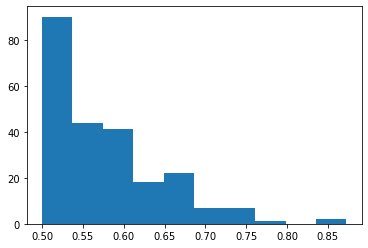

In [9]:
import matplotlib.pyplot as plt
plt.hist(model.predict_proba(counterfactuals.drop('income', axis=1))[:, 1])

(array([489., 204.,  72.,  36.,  11.,  11.,   5.,   4.,   7.,   3.]),
 array([0.50007135, 0.5280724 , 0.5560735 , 0.58407456, 0.6120756 , 0.64007676, 0.6680778 , 0.6960789 , 0.72407997, 0.75208104, 0.7800821 ], dtype=float32),
 <BarContainer object of 10 artists>)

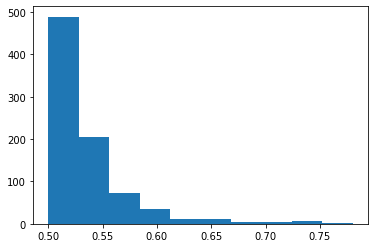

In [10]:
plt.hist(model.predict_proba(gs_counterfactuals.drop('income', axis=1))[:, 1])

In [11]:
analysis.to_csv('AR_LIME_run_linear.csv')

## Analysis Run for Various Recourse Types

Still breaks on Dice, Face a

In [6]:
import tensorflow as tf 
sess = tf.compat.v1.Session()
vae_params = [20,32,16,4]
recourse_list = {
                'Watcher':[Wachter,
                           {
                                #"feature_cost": "_optional_",
                                "lr": 0.01,
                                "lambda_": 0.01,
                                "n_iter": 1000,
                                "t_max_min": 0.5,
                                "norm": 1,
                                "clamp": True,
                                "loss_type": "BCE",
                                "y_target": [0, 1],
                                "binary_cat_features": True,
                           }
                          ],
                'GrowingSpheres' : [GrowingSpheres, 
                                    {}
                                   ],
                'ActionableRecourse' : [ActionableRecourse,
                                        {
                                            "fs_size": 500,
                                            "discretize": False,
                                            "sample": True,
                                        }
                                       ],
                'CCHVAE':[CCHVAE, 
                           { "data_name": 'adult',
                            "n_search_samples": 300,
                            "p_norm": 1,
                            "step": 0.1,
                            "max_iter": 1000,
                            "clamp": True,
                            "binary_cat_features": True,
                            "vae_params": {
                                "layers": vae_params,
                                "train": True,
                                "lambda_reg": 1e-6,
                                "epochs": 5,
                                "lr": 1e-3,
                                "batch_size": 32,
                            }}
                          ],
#                 CEM is only available for Tensorflow currently
#                 'CEM':[CEM,
#                        {
#                            "data_name": 'adult',
#                             "batch_size": 1,
#                             "kappa": 0.1,
#                             "init_learning_rate": 0.01,
#                             "binary_search_steps": 9,
#                             "max_iterations": 100,
#                             "initial_const": 10,
#                             "beta": 0.9,
#                             "gamma": 0.0,
#                             "mode": "PN",
#                             "num_classes": 2,
#                             "ae_params": {"hidden_layer": vae_params, "train_ae": True, "epochs": 5},
#                        }
#                        ],
                'Clue':[Clue,
                        {
                            "data_name": 'adult',
                            "train_vae": True,
                            "width": 10,
                            "depth": 3,
                            "latent_dim": 12,
                            "batch_size": 64,
                            "epochs": 1,
                            "lr": 0.001,
                            "early_stop": 10,
                        }
                        ],
                'CRUD':[CRUD,
                        {
                           "data_name": 'adult',
                            "target_class": [0, 1],
                            "lambda_param": 0.001,
                            "optimizer": "RMSprop",
                            "lr": 0.008,
                            "max_iter": 2000,
                            "binary_cat_features": False,
                            "vae_params": {
                                "layers": vae_params,
                                "train": True,
                                "epochs": 5,
                                "lr": 1e-3,
                                "batch_size": 32,
                            }
                        }
                        ],
                'Dice':[Dice,
                        {"num": 1, "desired_class": 1, "posthoc_sparsity_param": 0.1}
                        ],
                'Face':[Face,
                        {"mode": 'knn', "fraction": 0.1}
                        ],
                #'FeatureTweak':FeatureTweak,
                #'FOCUS':FOCUS,
                'Revise':[Revise,
                          {
                               "data_name": 'adult',
                                "lambda": 0.5,
                                "optimizer": "adam",
                                "lr": 0.1,
                                "max_iter": 1000,
                                "target_class": [0, 1],
                                "binary_cat_features": True,
                                "vae_params": {
                                    "layers": vae_params,
                                    "train": True,
                                    "lambda_reg": 1e-6,
                                    "epochs": 5,
                                    "lr": 1e-3,
                                    "batch_size": 32,
                                },
                          }
                         ]
                }

for method in recourse_list.keys():
    print(method)
    data_name = "adult" #"compas" "give_me_some_credit" "adult"
    dataset = DataCatalog(data_name)
    factuals = dataset.raw.iloc[:500]

    model = MLModelCatalog(dataset, "ann", backend='pytorch')
    if method in ['CEM']:
        recourse = recourse_list[method][0](sess, model,recourse_list[method][1])
    elif method in ['Clue']:
        recourse = recourse_list[method][0](dataset, model, recourse_list[method][1])
    else:
        recourse = recourse_list[method][0](model, recourse_list[method][1])
    counterfactuals = recourse.get_counterfactuals(factuals)

    benchmark = Benchmark(model, recourse, factuals)
    distances = benchmark.compute_distances()
    results = benchmark.run_benchmark()

    analysis = recourse_analysis(method, factuals, counterfactuals, results, print_row_count=30)
    counterfactuals.to_csv('results/{}_counterfactuals_nonlinear.csv'.format(method))
    analysis.to_csv('results/{}_analysis_nonlinear.csv'.format(method))
    
    

2022-05-05 20:25:01.499629: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Wachter
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/torch/serialization.py:591: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  " silence this warning)", UserWarning)
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeo

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Exp

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Count

/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeo

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Exp

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Count

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Cha

[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]
/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


[INFO] Timeout - No Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/wachter/library/wachter.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f_x_new = softmax(torch_model(x_new_enc))[:, 1]


factuals
--------
|    |   age | workclass   |   fnlwgt |   education-num | marital-status   | occupation            | relationship   | race      | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   |   income |
|---:|------:|:------------|---------:|----------------:|:-----------------|:----------------------|:---------------|:----------|:-------|---------------:|---------------:|-----------------:|:-----------------|---------:|
|  0 |    39 | Non-Private |    77516 |              13 | Non-Married      | Managerial-Specialist | Non-Husband    | White     | Male   |           2174 |              0 |               40 | US               |        0 |
|  1 |    50 | Non-Private |    83311 |              13 | Married          | Managerial-Specialist | Husband        | White     | Male   |              0 |              0 |               13 | US               |        0 |
|  2 |    38 | Private     |   215646 |               9 | Non-Married      | Other            

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/torch/serialization.py:591: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  " silence this warning)", UserWarning)


[[0.0], [0.8], [1.0], [0.19999999999999996], [0.6], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.3999999999999999], [0.0], [0.8], [0.6], [0.0], [0.0], [0.0], [0.19999999999999996], [1.0], [0.8], [0.19999999999999996], [0.3999999999999999], [1.0], [0.19999999999999996], [0.3999999999999999], [0.19999999999999996], [0.3999999999999999], [0.19999999999999996], [0.19999999999999996], [0.3999999999999999], [0.3999999999999999], [0.8], [0.0], [0.8], [0.8], [0.0], [0.0], [0.6], [1.0], [0.6], [0.6], [0.19999999999999996], [0.0], [0.3999999999999999], [0.19999999999999996], [0.0], [0.0], [0.8], [0.0], [0.8], [0.6], [0.0], [0.3999999999999999], [0.0], [0.8], [0.8], [0.0], [0.3999999999999999], [0.19999999999999996], [0.3999999999999999], [0.19999999999999996], [0.0], [1.0], [0.0], [0.19999999999999996], [0.0], [0.19999999999999996], [0.8], [0.3999999999999999], [1.0], [0.19999999999999996], [0.6], [0.19999999999999996], [0.8], [0.0], [0.0], [0.19999999999999996], [0.6], [0.399999999999999

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/torch/serialization.py:591: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  " silence this warning)", UserWarning)


[INFO] Start generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
obtained 500 items in 26.4 seconds
recovered all minimum-cost items
obtained 255 items in 4.9 seconds
obtained 500 items in 31.9 seconds
obtained 500 items in 23.1 seconds
obtained 500 items in 26.4 seconds
obtained 500 items in 23.5 seconds
obtained 500 items in 29.4 seconds
recovered all minimum-cost items
obtained 255 items in 4.7 seconds
obtained 500 items in 26.4 seconds
recovered all minimum-cost items
obtained 255 items in 4.6 seconds
[WARNING] Actionable Recourse is not able to produce a counterfactual explanation for instance 10 [model.py get_counterfactuals]
[WARNING] [0.2739726  0.18143311 0.6        0.         0.         0.80612245 0.         1.         1.         0.         1.         0.         1.         0.         1.         0.         0.         1.         0.         1.        ] [model.py get_counterfactuals]
recovered all minimum-cost items
obtained 255 items in 4.7 seconds
obtained 500 items 

recovered all minimum-cost items
obtained 255 items in 4.8 seconds
obtained 500 items in 27.4 seconds
obtained 500 items in 27.6 seconds
obtained 500 items in 24.5 seconds
recovered all minimum-cost items
obtained 127 items in 1.5 seconds
obtained 500 items in 28.4 seconds
recovered all minimum-cost items
obtained 255 items in 5.0 seconds
obtained 500 items in 21.1 seconds
obtained 500 items in 23.6 seconds
obtained 500 items in 23.0 seconds
obtained 500 items in 25.5 seconds
obtained 500 items in 30.0 seconds
obtained 500 items in 26.3 seconds
obtained 500 items in 23.8 seconds
obtained 500 items in 31.0 seconds
obtained 500 items in 29.3 seconds
obtained 500 items in 30.5 seconds
recovered all minimum-cost items
obtained 255 items in 5.0 seconds
obtained 500 items in 27.3 seconds
obtained 500 items in 29.0 seconds
obtained 500 items in 30.3 seconds
obtained 500 items in 21.8 seconds
obtained 500 items in 30.1 seconds
obtained 500 items in 25.2 seconds
obtained 500 items in 27.9 secon

obtained 500 items in 27.3 seconds
obtained 500 items in 30.0 seconds
obtained 500 items in 31.0 seconds
obtained 500 items in 21.3 seconds
obtained 500 items in 26.7 seconds
obtained 500 items in 29.4 seconds
obtained 500 items in 27.3 seconds
obtained 500 items in 30.5 seconds
obtained 500 items in 28.9 seconds
recovered all minimum-cost items
obtained 255 items in 4.6 seconds
obtained 500 items in 30.6 seconds
obtained 500 items in 23.7 seconds
obtained 500 items in 31.0 seconds
obtained 500 items in 29.4 seconds
recovered all minimum-cost items
obtained 255 items in 5.0 seconds
recovered all minimum-cost items
obtained 255 items in 4.6 seconds
obtained 500 items in 31.0 seconds
obtained 500 items in 30.4 seconds
obtained 500 items in 23.0 seconds
obtained 500 items in 28.8 seconds
obtained 500 items in 21.9 seconds
recovered all minimum-cost items
obtained 255 items in 4.5 seconds
recovered all minimum-cost items
obtained 255 items in 5.4 seconds
obtained 500 items in 22.5 seconds


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus

obtained 500 items in 27.2 seconds
recovered all minimum-cost items
obtained 255 items in 5.1 seconds
obtained 500 items in 31.5 seconds
obtained 500 items in 23.1 seconds
obtained 500 items in 26.3 seconds
obtained 500 items in 23.7 seconds
obtained 500 items in 28.5 seconds
recovered all minimum-cost items
obtained 255 items in 4.8 seconds
obtained 500 items in 29.1 seconds
recovered all minimum-cost items
obtained 255 items in 4.6 seconds
[WARNING] Actionable Recourse is not able to produce a counterfactual explanation for instance 10 [model.py get_counterfactuals]
[WARNING] [0.2739726  0.18143311 0.6        0.         0.         0.80612245 0.         1.         1.         0.         1.         0.         1.         0.         1.         0.         0.         1.         0.         1.        ] [model.py get_counterfactuals]
recovered all minimum-cost items
obtained 255 items in 4.7 seconds
obtained 500 items in 28.5 seconds
obtained 500 items in 31.7 seconds
obtained 500 items in 23.

obtained 500 items in 27.4 seconds
obtained 500 items in 27.5 seconds
obtained 500 items in 24.6 seconds
recovered all minimum-cost items
obtained 127 items in 1.5 seconds
obtained 500 items in 28.1 seconds
recovered all minimum-cost items
obtained 255 items in 5.1 seconds
obtained 500 items in 21.4 seconds
obtained 500 items in 23.6 seconds
obtained 500 items in 22.9 seconds
obtained 500 items in 27.9 seconds
obtained 500 items in 30.1 seconds
obtained 500 items in 26.7 seconds
obtained 500 items in 23.9 seconds
obtained 500 items in 31.0 seconds
obtained 500 items in 29.3 seconds
obtained 500 items in 28.9 seconds
recovered all minimum-cost items
obtained 255 items in 5.1 seconds
obtained 500 items in 24.7 seconds
obtained 500 items in 26.9 seconds
obtained 500 items in 29.9 seconds
obtained 500 items in 22.4 seconds
obtained 500 items in 30.3 seconds
obtained 500 items in 25.2 seconds
obtained 500 items in 27.7 seconds
obtained 500 items in 24.6 seconds
obtained 500 items in 24.2 se

obtained 500 items in 21.4 seconds
obtained 500 items in 25.7 seconds
obtained 500 items in 29.6 seconds
obtained 500 items in 27.0 seconds
obtained 500 items in 30.7 seconds
obtained 500 items in 28.8 seconds
recovered all minimum-cost items
obtained 255 items in 4.7 seconds
obtained 500 items in 31.1 seconds
obtained 500 items in 23.4 seconds
obtained 500 items in 31.0 seconds
obtained 500 items in 29.8 seconds
recovered all minimum-cost items
obtained 255 items in 5.1 seconds
recovered all minimum-cost items
obtained 255 items in 4.7 seconds
obtained 500 items in 31.5 seconds
obtained 500 items in 32.2 seconds
obtained 500 items in 24.8 seconds
obtained 500 items in 29.3 seconds
obtained 500 items in 20.5 seconds
recovered all minimum-cost items
obtained 255 items in 4.4 seconds
recovered all minimum-cost items
obtained 255 items in 5.3 seconds
obtained 500 items in 22.5 seconds
obtained 500 items in 25.5 seconds
recovered all minimum-cost items
obtained 255 items in 4.7 seconds
obt

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
[WARNING] Actionable Recourse is not able to produce a counterfactual explanation for instance 0 [model.py get_counterfactuals]
[WARNING] [0.2739726  0.18143311 0.6        0.         0.         0.80612245 0.         1.         1.         0.         1.         0.         1.         0.         1.         0.         0.         1.         0.         1.        ] [model.py get_counterfactuals]
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 21.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 127 items in 1.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 20.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
[WARNING] Actionable Recourse is not able to produce a counterfactual explanation for instance 0 [model.py get_counterfactuals]
[WARNING] [0.30136986 0.24015384 0.53333333 0.         0.         0.80612245 0.         1.         0.         1.         1.         0.         0.         1.         0.         1.         0.         1.         0.         1.        ] [model.py get_counterfactuals]
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 22.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 21.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 4.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 21.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 127 items in 1.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 21.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 127 items in 1.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 4.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 4.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 22.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 127 items in 1.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 22.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 21.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 21.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 21.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]
[WARNING] Actionable Recourse is not able to produce a counterfactual explanation for instance 0 [model.py get_counterfactuals]
[WARNING] [0.28767123 0.10634085 0.53333333 0.         0.         0.80612245 0.         1.         0.         1.         0.         1.         0.         1.         0.         1.         0.         1.         0.         1.        ] [model.py get_counterfactuals]
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)
/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 20.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 22.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 35.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 35.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 35.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 36.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 22.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 6.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 24.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 127 items in 1.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 127 items in 1.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 35.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 6.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 26.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 34.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 35.5 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 35.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 32.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 33.3 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 25.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 23.4 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 27.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 22.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.2 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 21.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 31.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.0 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.6 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.7 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 30.1 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 28.9 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


obtained 500 items in 29.8 seconds
[INFO] Start generating LIME coefficients [model.py get_counterfactuals]
[INFO] Finished generating LIME coefficients [model.py get_counterfactuals]


/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


recovered all minimum-cost items
obtained 255 items in 5.3 seconds
factuals
--------
|    |   age | workclass   |   fnlwgt |   education-num | marital-status   | occupation            | relationship   | race      | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   |   income |
|---:|------:|:------------|---------:|----------------:|:-----------------|:----------------------|:---------------|:----------|:-------|---------------:|---------------:|-----------------:|:-----------------|---------:|
|  0 |    39 | Non-Private |    77516 |              13 | Non-Married      | Managerial-Specialist | Non-Husband    | White     | Male   |           2174 |              0 |               40 | US               |        0 |
|  1 |    50 | Non-Private |    83311 |              13 | Married          | Managerial-Specialist | Husband        | White     | Male   |              0 |              0 |               13 | US               |        0 |
|  2 |    38 | Private     

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/torch/serialization.py:591: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  " silence this warning)", UserWarning)


[INFO] Start training of Variational Autoencoder... [models.py fit]
[INFO] [Epoch: 0/5] [objective: 0.811] [models.py fit]
[INFO] [ELBO train: 0.81] [models.py fit]
[INFO] [ELBO train: 0.16] [models.py fit]
[INFO] [ELBO train: 0.15] [models.py fit]
[INFO] [ELBO train: 0.14] [models.py fit]
[INFO] [ELBO train: 0.14] [models.py fit]
[INFO] ... finished training of Variational Autoencoder. [models.py fit]
[[0.19999999999999996], [0.19999999999999996], [0.0], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.0], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.0], [0.0], [0.19999999999999996], [0.19999999999999996], [0.19999999999999996], [0.1999999999

factuals
--------
|    |   age | workclass   |   fnlwgt |   education-num | marital-status   | occupation            | relationship   | race      | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   |   income |
|---:|------:|:------------|---------:|----------------:|:-----------------|:----------------------|:---------------|:----------|:-------|---------------:|---------------:|-----------------:|:-----------------|---------:|
|  0 |    39 | Non-Private |    77516 |              13 | Non-Married      | Managerial-Specialist | Non-Husband    | White     | Male   |           2174 |              0 |               40 | US               |        0 |
|  1 |    50 | Non-Private |    83311 |              13 | Married          | Managerial-Specialist | Husband        | White     | Male   |              0 |              0 |               13 | US               |        0 |
|  2 |    38 | Private     |   215646 |               9 | Non-Married      | Other            

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/torch/serialization.py:591: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  " silence this warning)", UserWarning)


[INFO] 
Net: [utils.py __init__]
[INFO] VAE_gauss_net [fc_gauss_cat.py __init__]
[INFO] Total params: 0.00M [fc_gauss_cat.py create_net]
[INFO] 
Network: [train.py train_VAE]
[INFO] 
Train: [train.py train_VAE]
[INFO] init cost variables: [train.py train_VAE]


/Users/ianhardy/Documents/Recourse/CARLA/carla/recourse_methods/catalog/clue/library/clue_ml/src/radam.py:55: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:882.)
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


[INFO] it 0/1, vlb -8.975455,  [train.py train_VAE]
[INFO] time: 5.238597 seconds
 [train.py train_VAE]
[INFO] vlb -4.496460 (-inf)
 [train.py train_VAE]
[INFO] Writting /Users/ianhardy/carla/models/autoencoders/clue/fc_VAE_adult_models/theta_best.dat
 [utils.py save]
[INFO] Writting /Users/ianhardy/carla/models/autoencoders/clue/fc_VAE_adult_models/theta_last.dat
 [utils.py save]
[INFO] average time: 6.168447 seconds
 [train.py train_VAE]
[INFO] 
RESULTS: [train.py train_VAE]
[INFO] best_vlb_dev: -4.496460 [train.py train_VAE]
[INFO] best_vlb_train: -8.975455 [train.py train_VAE]
[INFO] nb_parameters: 1384 (1.35KB)
 [train.py train_VAE]
[INFO] 
Net: [utils.py __init__]
[INFO] VAE_gauss_net [fc_gauss_cat.py __init__]
[INFO] Total params: 0.00M [fc_gauss_cat.py create_net]
[INFO] Reading /Users/ianhardy/carla/models/autoencoders/clue/fc_VAE_adult_models/theta_best.dat
 [utils.py load]
[INFO] restoring epoch: 1, lr: 0.001000 [utils.py load]
[[1.0], [1.0], [1.0], [0.8], [0.8], [0.39999999

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/torch/serialization.py:591: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  " silence this warning)", UserWarning)


[INFO] Start training of CSVAE... [models.py fit]


  0%|                                                                                                  | 0/5 [00:00<?, ?it/s]

[INFO] epoch 0: x recon loss: 0.1517026382858522 [models.py fit]
[INFO] epoch 0: y recon loss: 25.679338861417957 [models.py fit]


 20%|██████████████████                                                                        | 1/5 [00:14<00:55, 14.00s/it]

[INFO] epoch 1: x recon loss: 0.14629640764169893 [models.py fit]
[INFO] epoch 1: y recon loss: 24.521385011010526 [models.py fit]


 40%|████████████████████████████████████                                                      | 2/5 [00:27<00:41, 13.98s/it]

[INFO] epoch 2: x recon loss: 0.14302435679407607 [models.py fit]
[INFO] epoch 2: y recon loss: 24.131511080363996 [models.py fit]


 60%|██████████████████████████████████████████████████████                                    | 3/5 [00:41<00:27, 13.65s/it]

[INFO] epoch 3: x recon loss: 0.13972058637875717 [models.py fit]
[INFO] epoch 3: y recon loss: 23.936479988448117 [models.py fit]


 80%|████████████████████████████████████████████████████████████████████████                  | 4/5 [00:54<00:13, 13.66s/it]

[INFO] epoch 4: x recon loss: 0.13770489656948637 [models.py fit]
[INFO] epoch 4: y recon loss: 23.819096583495135 [models.py fit]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:07<00:00, 13.59s/it]

[INFO] ... finished training of CSVAE [models.py fit]


[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0]]
factuals
--------
|    |   age | workclass   |   fnlwgt |   education-num | marital-status   | occupation            | relationship   | race      | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   |   income |
|---:|------:|:------------|---------:|----------------:|:-----------------|:-----------------

/opt/anaconda3/envs/carla_research/lib/python3.7/site-packages/torch/serialization.py:591: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  " silence this warning)", UserWarning)


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [ ]:


print('Demographic visualization', 'Diversiry')

print('Recourse generation method performance metrics: (qualitative)\n-------------------------------------------------------------\n')
# print('Validity', 'User Preference', 'Unbiased', 'Explainable steps')
print('Recourse generation method performance metrics: (subjective)\n------------------------------------------------------------\n')
print('')

#         \item Validity
#         \item Sparsity
#         \item Feasibility
#         \item Actionability
#         \item Causality
#         \item Proximity to factual data point
#         \item Closeness to data manifold
#         \item User preference
#         \item Unbiased
#         \item Explainable steps
#         \item Demographic visualization
#         \item Generation time
#         \item Diversity

Counterfactuals performance: (qualitative)
------------------------------------------
|    |   Sparsity |   Proximity |   Distance_4 |   Constraint_Violation |   Redundancy |   y-Nearest-Neighbours |   Success_Rate |   Average_Time |
|---:|-----------:|------------:|-------------:|-----------------------:|-------------:|-----------------------:|---------------:|---------------:|
|  0 |         10 |     1.18442 |            1 |                      0 |            8 |                      0 |           0.02 |      0.0209513 | 



Demographic visualization Diversiry
Recourse generation method performance metrics: (qualitative)
-------------------------------------------------------------

Validity User Preference Unbiased Explainable steps
Recourse generation method performance metrics: (subjective)
------------------------------------------------------------



In [ ]:

def printTable(data, headers=None, print_row_count=3):
    # data is a list of rows where each row is in turn a list 
    # headers is a list of column names
    if not headers:
        df = pd.DataFrame(data)
    else:
        df = pd.DataFrame(data, columns = headers)
    print(df.iloc[:print_row_count,:].to_markdown())


def getRecoursePerf(actions, factuals):
    '''

    Distance_1 = Sparsity
    Distance_2 = Proximity (sum of absolute delta)
    Constraint_Violation

    '''
    metrics = ['Proximity', 'Closeness', 'Sparsity', 'Steps', 'Diversity'] 
    perfData = []

    for f, a in zip(factuals, actions):
        perf = []
        for metric in metrics:
            if metric == 'Proximity':
                d = 0
                perf.append(d)
            elif metric == 'Closeness':
                d = 0
                perf.append(d)
            elif metric == 'Sparsity':
                d = 0
                perf.append(d)
            elif metric == 'Steps':
                d = 0
                perf.append(d)
            elif metric == 'Diversity':
                d = 0
                perf.append(d)
        perfData.append(perf)

    return metrics, perfData


actions, factuals = [[1,2,3], [4,5,6]], [[0,1,2], [5,6,7]]

# get performance metrics for recourse
perfData, metrics = getRecoursePerf(actions, factuals)

# print recourse performance table
printTable(metrics, perfData)

|    |   Proximity |   Closeness |   Sparsity |   Steps |   Diversity |
|---:|------------:|------------:|-----------:|--------:|------------:|
|  0 |           0 |           0 |          0 |       0 |           0 |
|  1 |           0 |           0 |          0 |       0 |           0 |


In [ ]:
from carla import Data, MLModel
from carla.recourse_methods import GrowingSpheres

# first implement the dataset wrapper
class MyOwnData(Data):
    def __init__(self):
        # the dataset could be loaded in the constructor
        self._dataset = load_dataset_from_disk()

    def categoricals(self):
        # this property contains a list of all categorical features
        return [...]

    def continous(self):
        # this property contains a list of all continuous features
        return [...]

    def immutables(self):
        # this property contains a list of features which should not be changed by the recourse method
        return [...]

    def target(self):
        # this property contains the feature name of the target column
        return "label"

    def raw(self):
        # this property contains the not encoded and not normalized, raw dataset
        return self._dataset

# second, implement the black-box-model wrapper
class MyOwnModel(MLModel):
    def __init__(self, data):
        super().__init__(data)
        # the constructor can be used to load or build an arbitrary black-box-model
        self._mymodel = load_model()

        # this property contains a fitted scaler to normalize input data
        # MinMaxScaler from sklearn is predefined, but can be redefined by every other sklearn scaler
        self.scaler = MySklearnScaler().fit()

        # the same is possible for data encoding
        # OneHotEncoder from sklearn with dropped first column for binary data is predefined, but can be
        # changed into any other sklearn encoder.
        self.encoder = MySklearnEncoder.fit()

    def feature_input_order(self):
        # this property contains a list of the correct input order of features for the ml model
        return [...]

    def backend(self):
        # this property contains a string with the used backend of the model
        return "pytorch"

    def raw_model(self):
        # this property contains the fitted/ loaded black-box-model
        return self._mymodel

    def predict(self, x: Union[np.ndarray, pd.DataFrame]):
        # the predict function outputs the continous prediction of the model, similar to sklearn.
        return self._mymodel.predict(x)

    def predict_proba(self, x: Union[np.ndarray, pd.DataFrame]):
        # the predict_proba method outputs the prediction as class probabilities, similar to sklearn
        return self._mymodel.predict_proba(x)


# after implementing the user-specific model and dataset, the call of the recourse method,
# and the generation of counterfactuals stays the same.
dataset = MyOwnData()
model = MyOwnModel(dataset)

# get some factuals from the data to generate counterfactual examples
factuals = dataset.raw.iloc[:10]


# load recourse model with model specific hyperparameter
gs = GrowingSpheres(model)

# generate counterfactual examples
counterfactuals = gs.get_counterfactuals(factuals)





from carla import RecourseMethod

# similar to data- and model wrapper, call the recourse method wrapper
class MyRecourseMethod(RecourseMethod):
    def __init__(self, mlmodel):
        super().__init__(mlmodel)
        # the constructor can be used to load the recourse method,
        # or construct everything necessary

    def get_counterfactuals(self, factuals: pd.DataFrame):
        # this property is responsible to generate and output
        # encoded and scaled counterfactual examples
        # as pandas DataFrames
        return counterfactual_examples


+---------------------------------+----------------+------------+------------+----------------+----------------+-----------+-----------+-----------+-------+---------+
|                            name |  variable type | actionable | compatible | step direction | flip direction | grid size | step type | step size |    lb |      ub |
+---------------------------------+----------------+------------+------------+----------------+----------------+-----------+-----------+-----------+-------+---------+
|                   ForeignWorker | <class 'bool'> |      False |        nan |              0 |            nan |         2 |  absolute |       1.0 |   0.0 |     1.0 |
|                          Single | <class 'bool'> |      False |        nan |              0 |            nan |         2 |  absolute |       1.0 |   0.0 |     1.0 |
|                             Age |  <class 'int'> |      False |        nan |              0 |            nan |        49 |  relative |      0.01 |  20.0 |    68.0 